### Загрузите данные и подготовьте их к анализу

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

#### Бриф

Данное исследование будет проходить по данным приложения Procrastinate Pro+. 
    
Нам даны фреймы с визитами, заказами и расходами на рекламу. Работа состоит из выполения следующих задач:

    1) Подготовка данных к исследованию.

    2) Первичного исследдования аудитории по источникам, гео, устройствам и стоимости трафика.

    3) Оценка окупаемости рекламы, используя функции для построения сводных таблиц и графиков LTV, САС, ROI, их изменения во времени, а также удержание и конверсия траффика по источникам, гео, устройствам пользователей.

    4) Подведение итогов и формирование рекомендаций.
    
Моя цель - дать рекомендации, которые приведут к увеличению эффективности рекламных компаний.

#### Подготовка к работе

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import warnings

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

warnings.filterwarnings('ignore')

In [31]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
expenses = pd.read_csv('costs_info_short.csv')


In [32]:
df_list = [visits, orders, expenses]

def df_info (df_list):
    y = [[x.head(5),x.describe(), x.info()] for x in df_list]
    return y 

df_info(df_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

Пропусков нет

#### Предобработка данных

In [33]:
visits['Region'] = visits['Region'].str.strip()
visits['Device'] = visits['Device'].str.strip()
visits['Channel'] = visits['Channel'].str.strip()
expenses['Channel'] = expenses['Channel'].str.strip()


Удалили пробелы, проверим на дубликаты.

In [34]:
#visits.duplicated().sum()
#orders.duplicated().sum()
#expenses.duplicated().sum()

Абсолютных дубликатов по всем столбцам нет, по отдельным полям нет смысла рассматривать.

In [35]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt']) 
expenses['dt'] = pd.to_datetime(expenses['dt']).dt.date

Преобразовали данные в столбцах со временем с помощью функции to_datetime

In [36]:
visits.columns = visits.columns.str.replace(' ', '_')
visits.columns = visits.columns.str.lower()

orders.columns = orders.columns.str.replace(' ', '_')
orders.columns = orders.columns.str.lower()

expenses.columns = expenses.columns.str.replace(' ', '_')
expenses.columns = expenses.columns.str.lower()

In [39]:
df_info(df_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

[[        user_id         region   device  channel       session_start  \
  0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
  1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
  2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
  3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
  4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   
  
            session_end  
  0 2019-05-01 02:45:01  
  1 2019-05-01 04:47:35  
  2 2019-05-01 15:32:08  
  3 2019-05-01 00:54:25  
  4 2019-05-01 03:57:40  ,
                user_id
  count       309901.00
  mean  499766449382.69
  std   288789916887.83
  min         599326.00
  25%   249369122776.00
  50%   498990589687.00
  75%   749521111616.00
  max   999999563947.00,
  None],
 [        user_id            event_dt  revenue
  0  188246423999 2019-05-01 23:09:52     4.99
  1  174361394180 2019-05-01 12:24:04     4.99
  2  529610067795 2019-05-01 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей

In [40]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Функция для расчёта удержания

In [41]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта конверсии

In [42]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта удержания

In [43]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания фрейма

In [44]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для визуализации удержания

In [45]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии

In [46]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [47]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Создаем профили

In [48]:
profiles_raw = get_profiles(visits, orders, events = None, ad_costs = expenses)

profiles_raw.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


#### Исследуем профили

In [49]:
print('Минимальная дата привлечения пользователя:',profiles_raw['first_ts'].min(),'\n',
      'Максимальная дата привлечения пользователя:',profiles_raw['first_ts'].max()
     )

Минимальная дата привлечения пользователя: 2019-05-01 00:00:41 
 Максимальная дата привлечения пользователя: 2019-10-27 23:59:04


Видим, что данные по привлечению пользователей есть за временной промежуток в, почти, 6 месяцев.

##### Исследуем профили по региону

In [50]:
(
    profiles_raw.groupby('region').agg({'user_id' : 'nunique' ,'payer' : 'mean'}).
    sort_values(by = 'payer', ascending = False).rename(columns = {'user_id' : 'total_users'})
)

,total_users,payer
region,,
United States,100002,0.07
Germany,14981,0.04
UK,17575,0.04
France,17450,0.04


Страна, из которой больше всего приходит новых пользователей - США, также у неё самая высокая доля платящих пользователей. 

##### Исследуем профили по девайсу

In [51]:
(
    profiles_raw.groupby('device').agg({'user_id' : 'nunique' ,'payer' : 'mean'}).
    sort_values(by = 'payer', ascending = False).rename(columns = {'user_id' : 'total_users'})
)

,total_users,payer
device,,
Mac,30042,0.06
iPhone,54479,0.06
Android,35032,0.06
PC,30455,0.05


Наибольшая доля плательщиков пользуется продукцией apple.

##### Исследуем профили по источнику

In [52]:
(
    profiles_raw.groupby('channel').agg({'user_id' : 'nunique' ,'payer' : 'mean'}).
    sort_values(by = 'payer', ascending = False).rename(columns = {'user_id' : 'total_users'})
)

,total_users,payer
channel,,
FaceBoom,29144,0.12
AdNonSense,3880,0.11
lambdaMediaAds,2149,0.10
TipTop,19561,0.10
RocketSuperAds,4448,0.08
WahooNetBanner,8553,0.05
YRabbit,4312,0.04
MediaTornado,4364,0.04
LeapBob,8553,0.03


Согласно сводной таблице наименьшая доля плательщиков среди орган. траффика. Топ 3 каналов привлечения платащих пользователей занимают 1) FaceBoom, 2) AdNonSense, 3) LambdaMediaAds c долей платящих пользователей в 12%, 11% и 10% соответственно. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [53]:
print('Общая сумма расходов на маркетинг: ', round(expenses['costs'].sum(), 1))

Общая сумма расходов на маркетинг:  105497.3


In [54]:
expenses_by_channels = expenses.groupby('channel')['costs'].sum().sort_values(ascending = False)
expenses_by_channels

channel
TipTop               54751.30
FaceBoom             32445.60
WahooNetBanner        5151.00
AdNonSense            3911.25
OppleCreativeMedia    2151.25
RocketSuperAds        1833.00
LeapBob               1797.60
lambdaMediaAds        1557.60
MediaTornado           954.48
YRabbit                944.22
Name: costs, dtype: float64

Самые высокие расходы были по каналам TipTop(4-е место по доле плательщиков) и FaceBoom(1-е место по доле плательщиков)

In [55]:
profiles_by_channels = profiles_raw.groupby('channel')['user_id'].nunique().sort_values(ascending = False)
profiles_by_channels

channel
organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
LeapBob                8553
WahooNetBanner         8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: user_id, dtype: int64

Самое высокое число профилей относится к органическому траффику - 56439 юзеров, на втором месте FaceBoom - 29144 юзера, а на третьем TipTop - 19561 юзер.

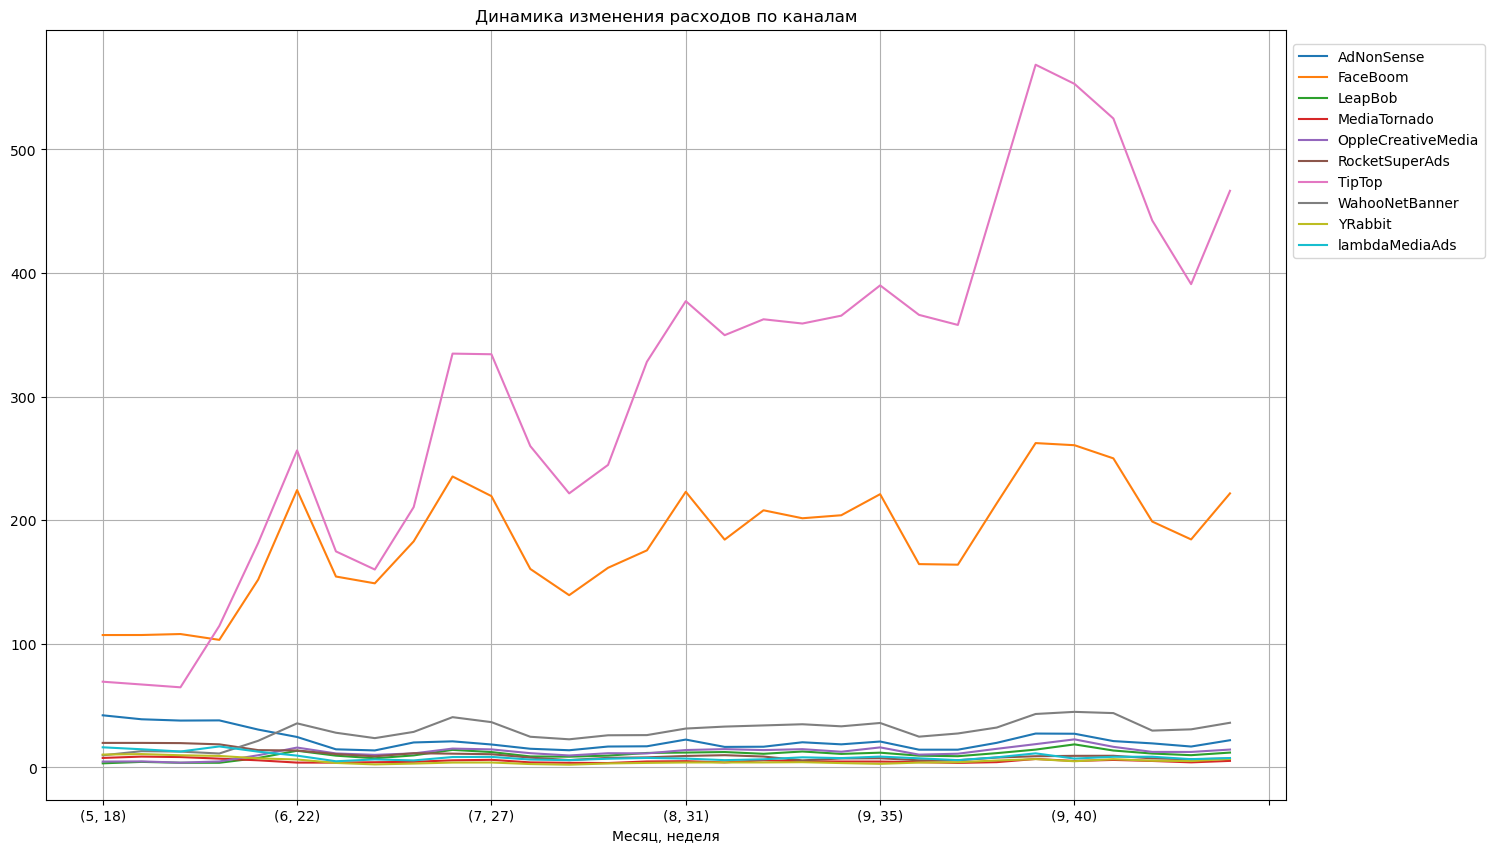

In [56]:
costs = pd.read_csv('costs_info_short.csv')

costs['dt'] = pd.to_datetime(costs['dt'])

costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

costs_grouped = costs.pivot_table(
        index=('month','week'), columns= 'Channel', values= 'costs', aggfunc='mean'
    )

costs_grouped.plot(grid=True,figsize=(16,10))

plt.xlabel('Месяц, неделя')
plt.title('Динамика изменения расходов по каналам')

plt.legend(bbox_to_anchor=(1, 0.99));

Самый высокий пик расходов на рекламу пришёлся на последнюю неделю Июля.

In [57]:
cac = pd.merge(expenses_by_channels, profiles_by_channels, on = 'channel')

cac['cac'] = cac['costs']/cac['user_id']

cac.rename(columns = {'costs' : 'costs_per_channel', 'user_id' : 'users_per_channel'}).sort_values(by = 'cac', ascending = False)

,costs_per_channel,users_per_channel,cac
channel,,,
TipTop,54751.30,19561,2.80
FaceBoom,32445.60,29144,1.11
AdNonSense,3911.25,3880,1.01
lambdaMediaAds,1557.60,2149,0.72
WahooNetBanner,5151.00,8553,0.60
RocketSuperAds,1833.00,4448,0.41
OppleCreativeMedia,2151.25,8605,0.25
YRabbit,944.22,4312,0.22
MediaTornado,954.48,4364,0.22


Топ три по стоимости привлечения траффика занимают такие источники как: 

    1) TipTop - 2.79 за пользователя
    2) FaceBoom - 1.11 
    3) AdNonSense - 1.01 за пользователя. 
Топ с конца достаётся LeapBob - 0.21, MediaTornado - 0.22 и YRabbit - 0.22. 

 Подведя итоги данного этапа и используя полученную информацию из 3-го этапа, можно выделить 3 канала с хорошими показателями привлечения платящей аудитории и с умеренной стоимостью привлечения. На первое место я поставлю такой источник трафика как - lamdaMediaAds (0.73 - стоимость привлечечния одного юзера из которых доля платащих составляет 10,5%), на втором месте - AdNonSense (1.01 - стоимость привлечечния одного юзера из которых доля платащих составляет 11,3%) и на третье, с небольшим отставанием - FaceBoom (1.11 - стоимость привлечечния одного юзера из которых доля платащих составляет 12,2%).

In [58]:
cac['cac'].median()

0.5071700750588586

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Мы исследуем эффективность рекламы, соответственно, органический траф не рассматриваем.

#### Подготовка данных

In [59]:
horizon_days = 14
observation_date = datetime(2019, 11, 1).date()

profiles = profiles_raw.query('channel != "organic"')

profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93569 entries, 0 to 150006
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           93569 non-null  int64         
 1   first_ts          93569 non-null  datetime64[ns]
 2   channel           93569 non-null  object        
 3   device            93569 non-null  object        
 4   region            93569 non-null  object        
 5   dt                93569 non-null  object        
 6   month             93569 non-null  datetime64[ns]
 7   payer             93569 non-null  bool          
 8   acquisition_cost  93569 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 6.5+ MB


Убираем органический траф из фрейма профилей, получаем 93569 профиля. 

#### Строим графики LTV, ROI и графики динамики LTV, CAC, ROI

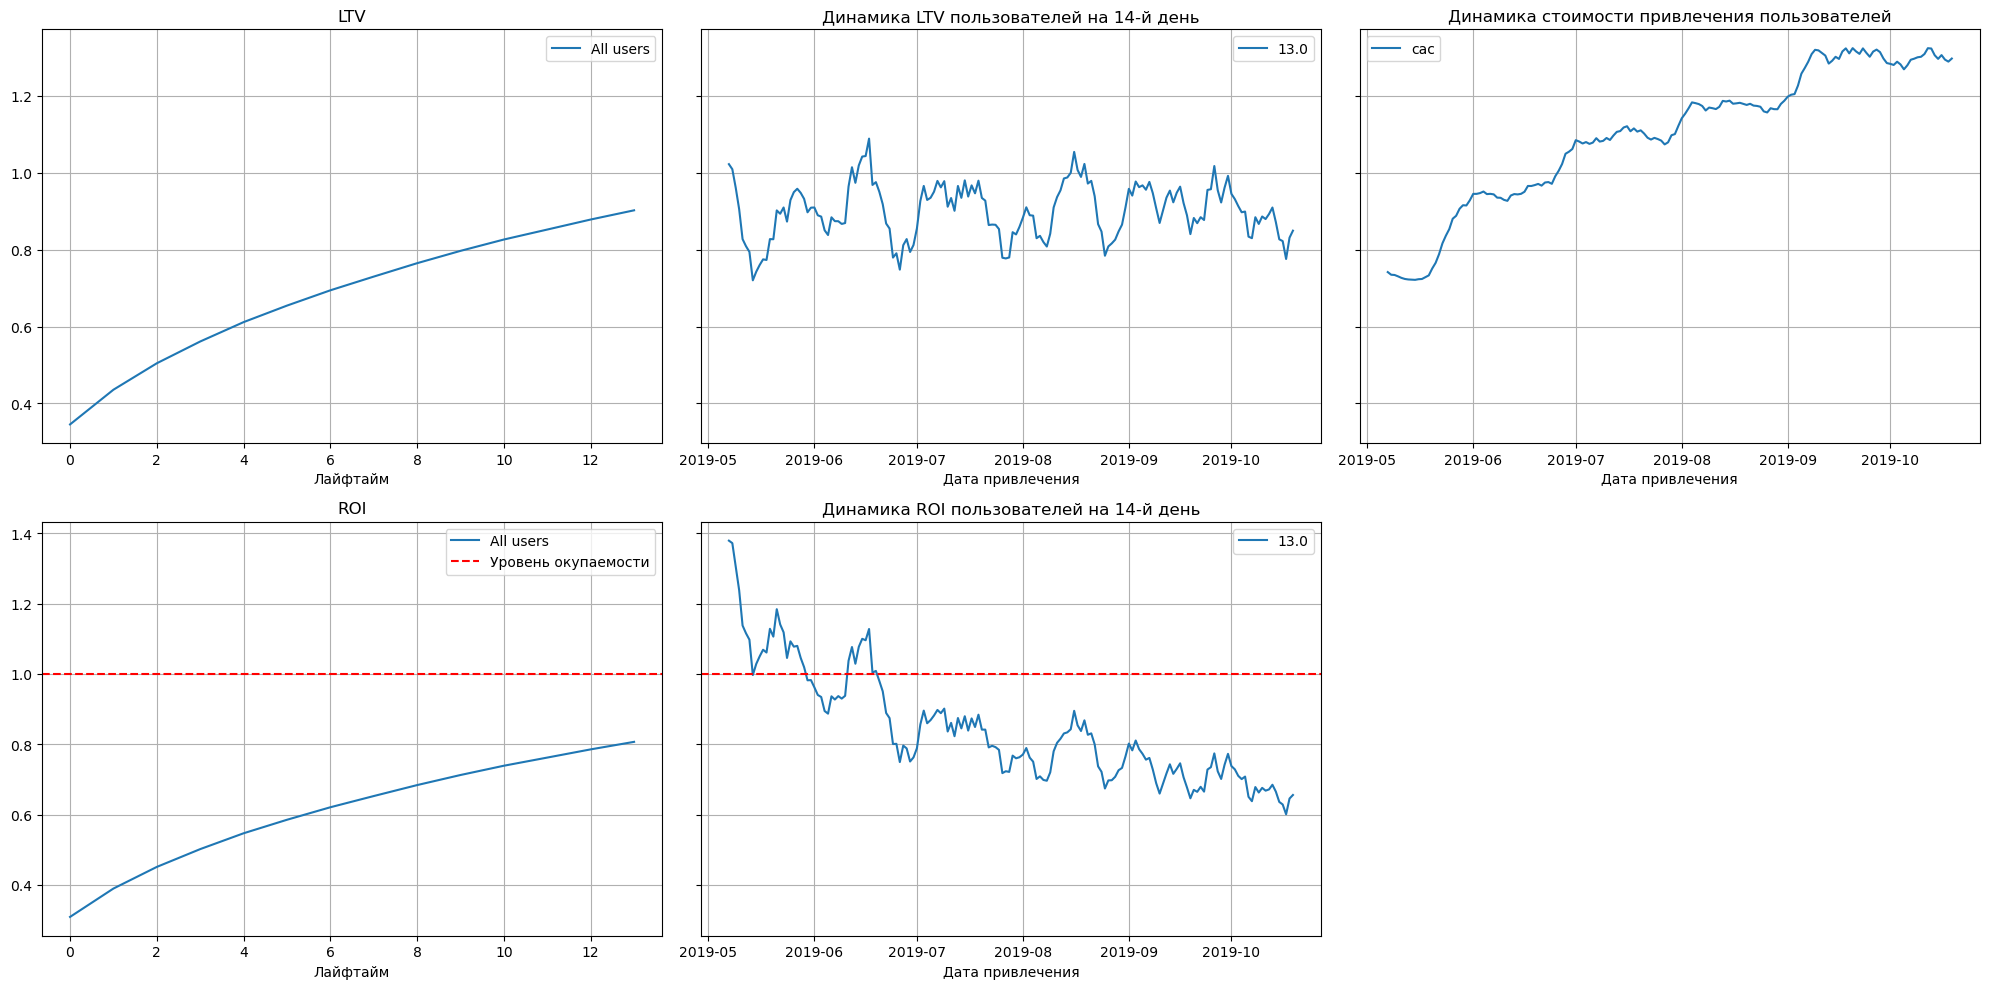

In [60]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
  profiles, orders, observation_date, horizon_days)

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days)

1) Реклама не окупается, ROI в конце 2-ой недели около 80%

2) Стоимость привлечения пользователей сильно выросла к концу периода.

3) LTV динамика вполне стабильна, качество юзеров не привлекает внимания.

4) По динамике ROI предположу, что с течением времени могло произойти:
    
    а) Эффективность рекламных компаний сильно упала(возрасла стоимость, низкая конверсия).
    
    б) Технические сбои у пользователей определенного устройства.
    
    в) Плохой показатель удержания пользователей.

#### Окупаемость рекламы по устройствам

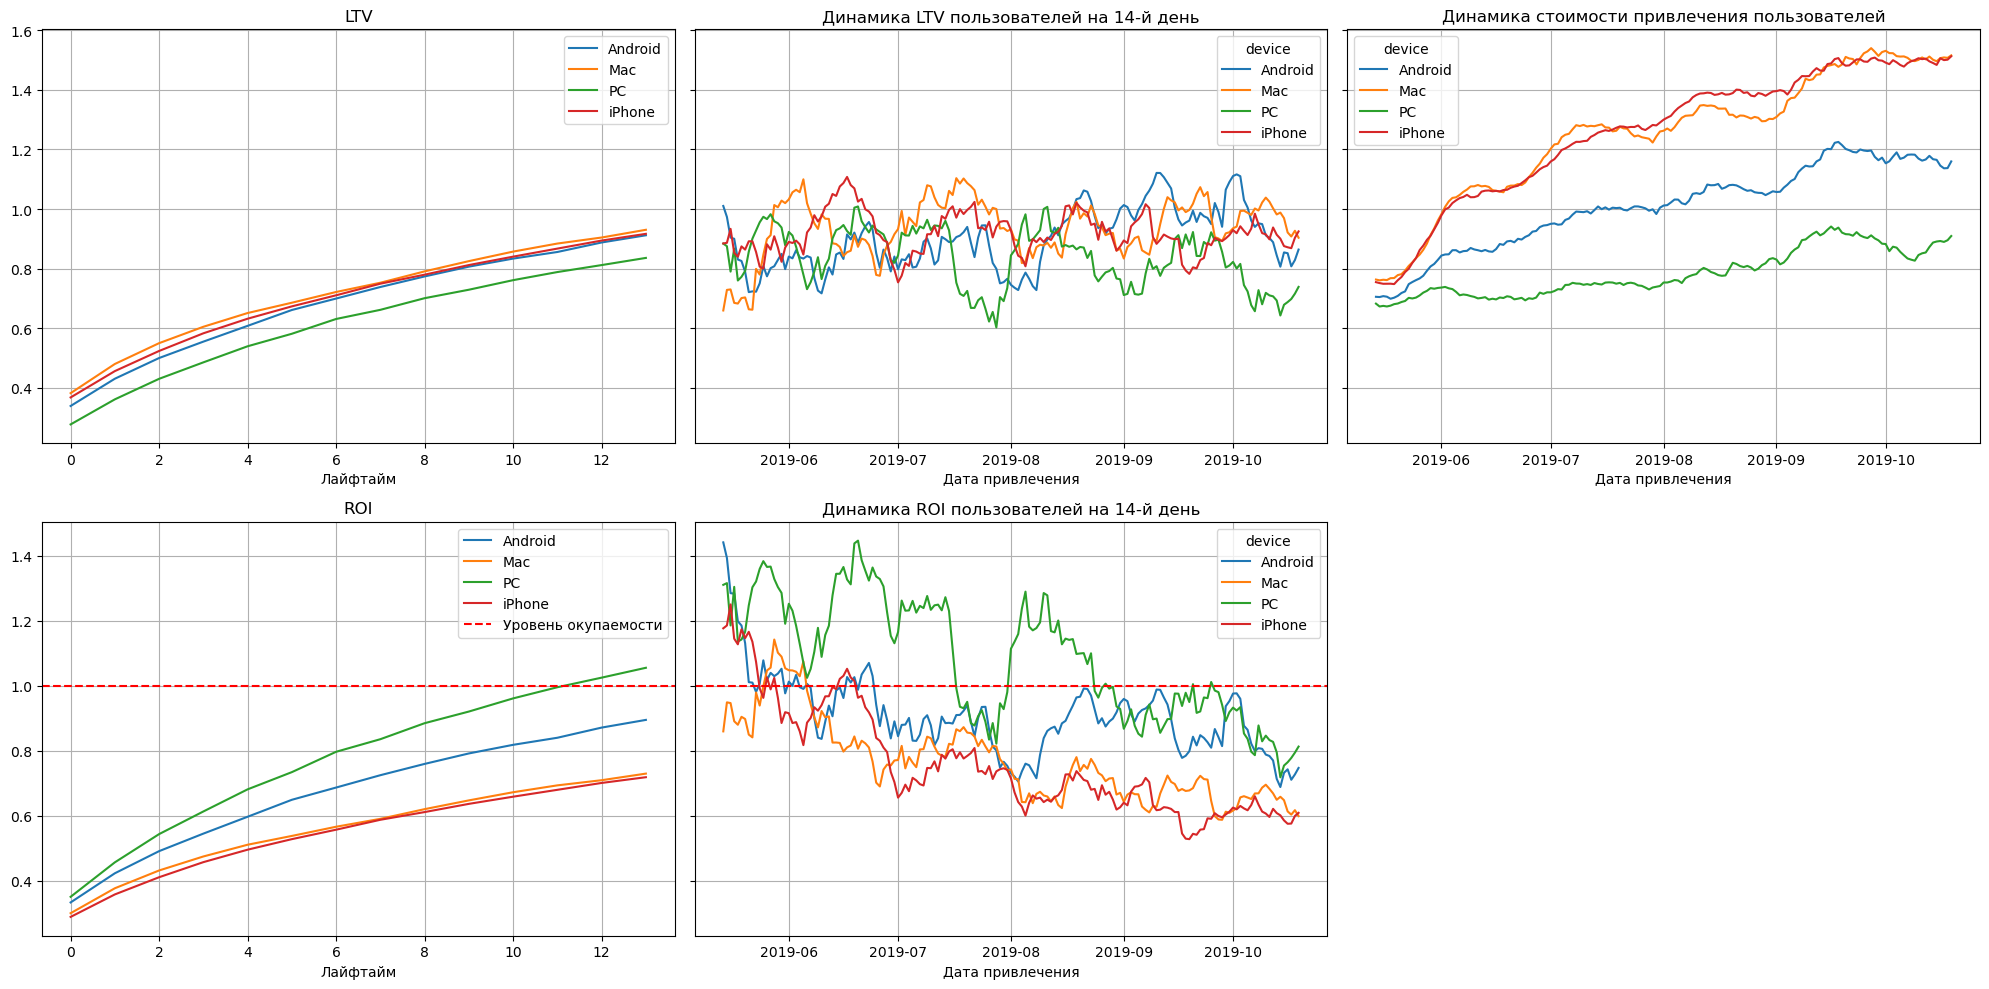

In [61]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
  profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=14)

Благодаря разбивке по устройствам можно увидеть:

1) Реклама не окупается везде, кроме как пользователей PC. 

2) Вероятно, низкая окупаемость связана с сильно возрастающей стоимостью привлечения пользоватей.

3) Динамика LTV не подвержена сильным изменениям.

#### Окупаемость рекламы по странам

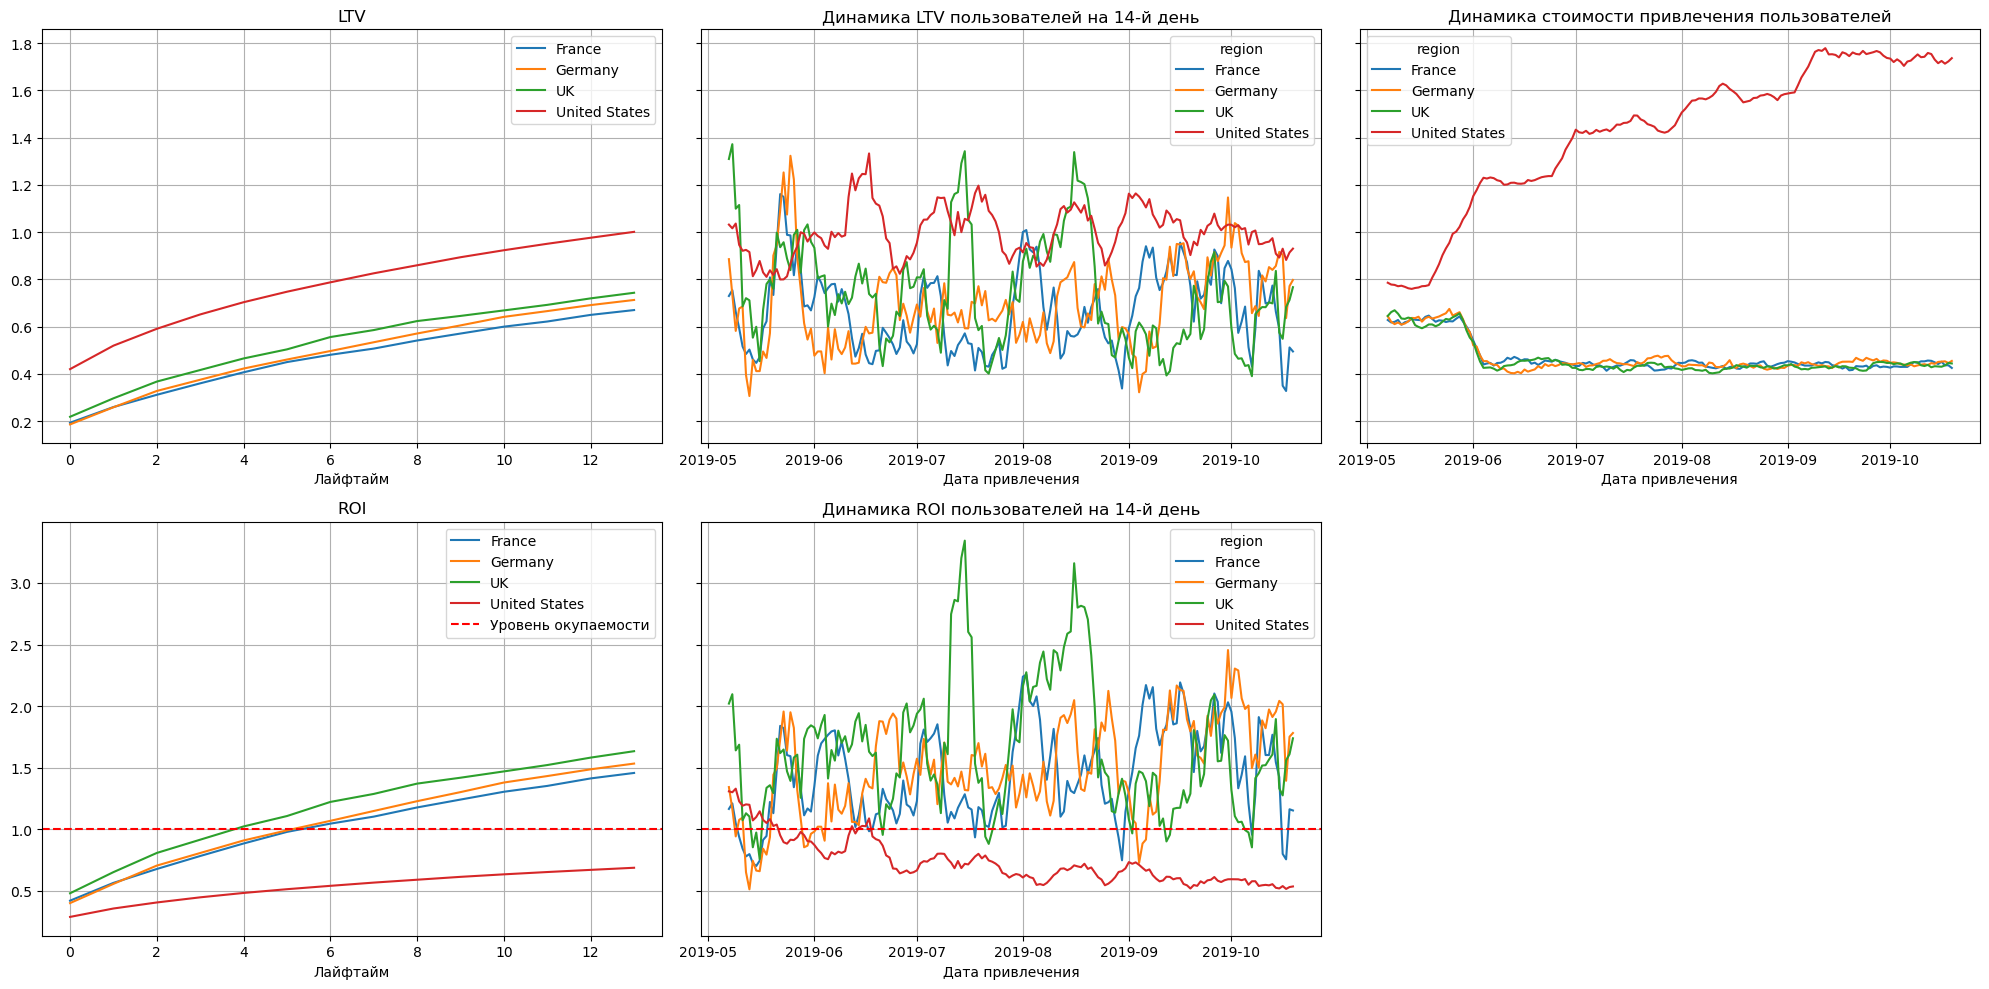

In [62]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
  profiles, orders, observation_date, horizon_days, dimensions = ['region'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days)

Благодаря разбивке по странам можно увидеть:

1) Реклама окупается везде, кроме как в США. 

2) Стоимость привлечения пользователей везде, кроме как в США, стабильная.

#### Окупаемость рекламы по источникам

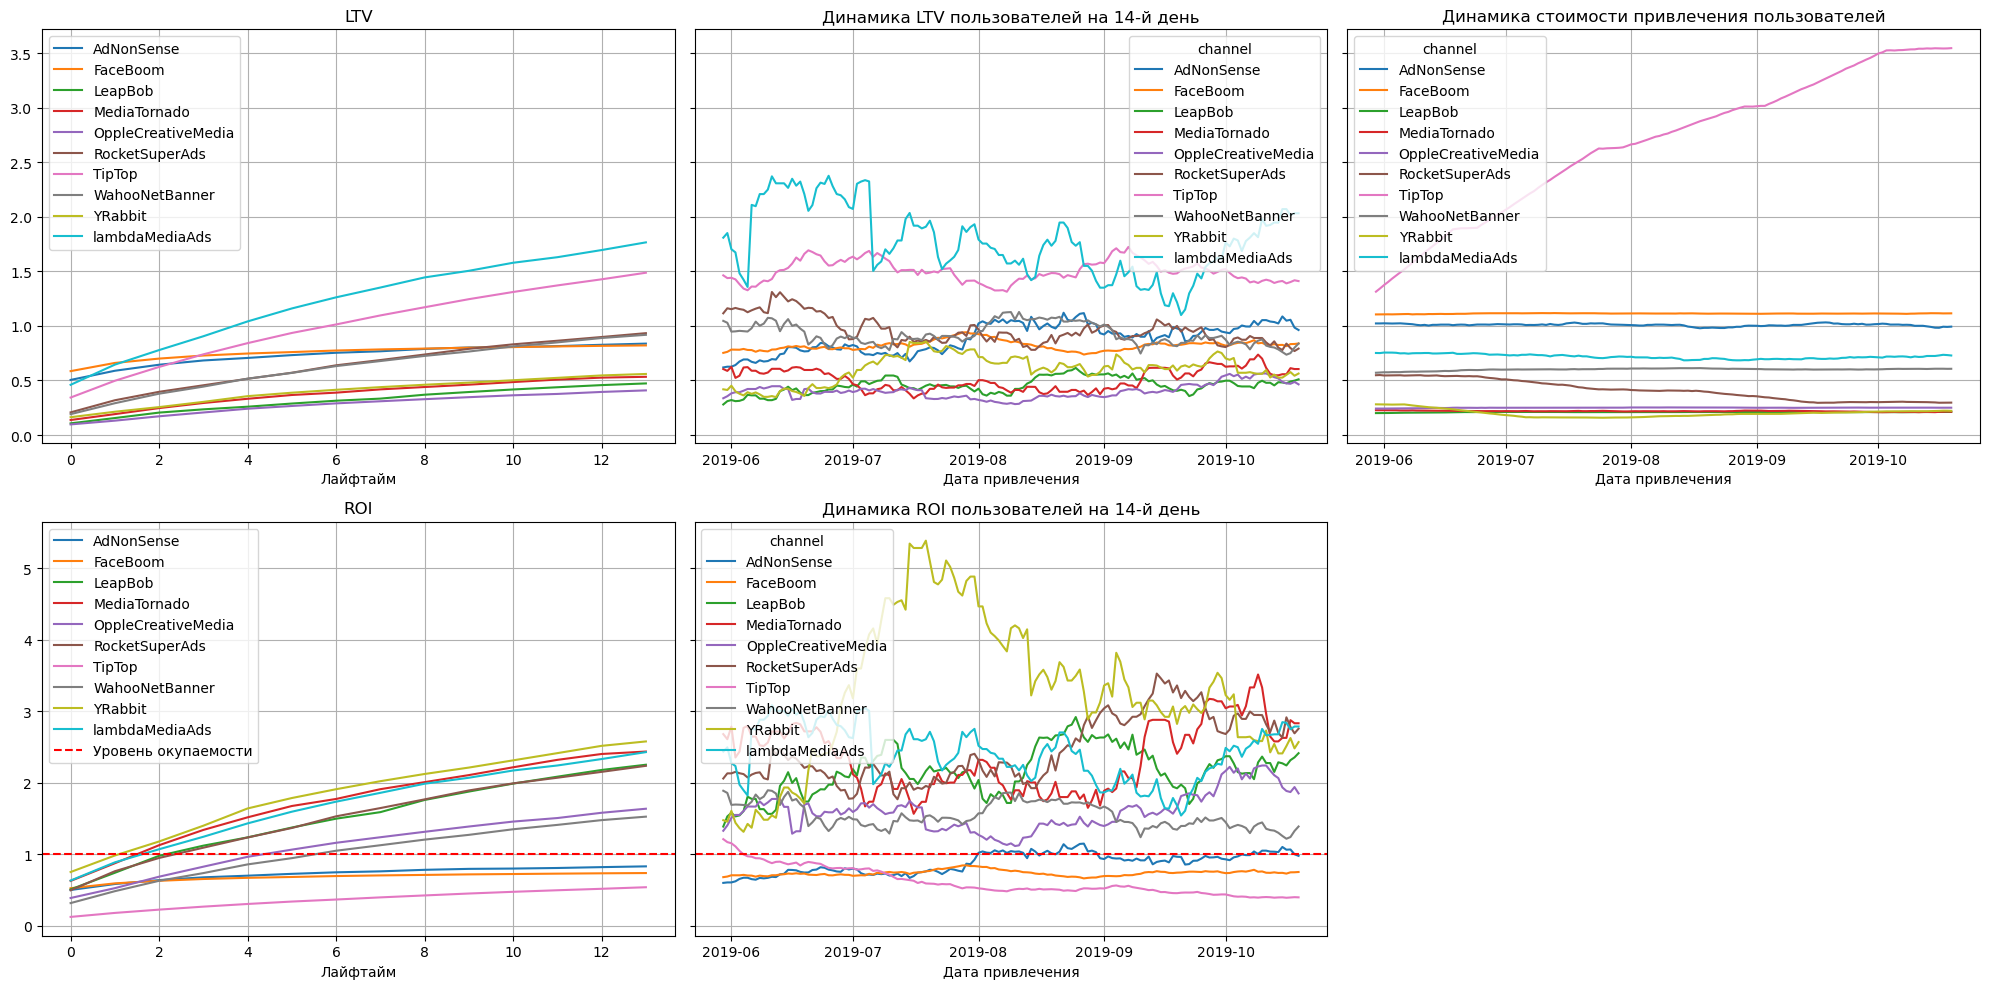

In [63]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
  profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=30)

Благодаря разбивке по источникам траффика можно увидеть:

    1) Реклама окупается везде, кроме как в FaceBoom, AdNonSense и TipTop.

    2) Стоимость привлечения пользователей везде, кроме как в TipTop, стабильная.

В топ источников по ROI можно выделить - YRabbit, lambdaMediaAds, MediaTornado.

#### Конверсия по странам

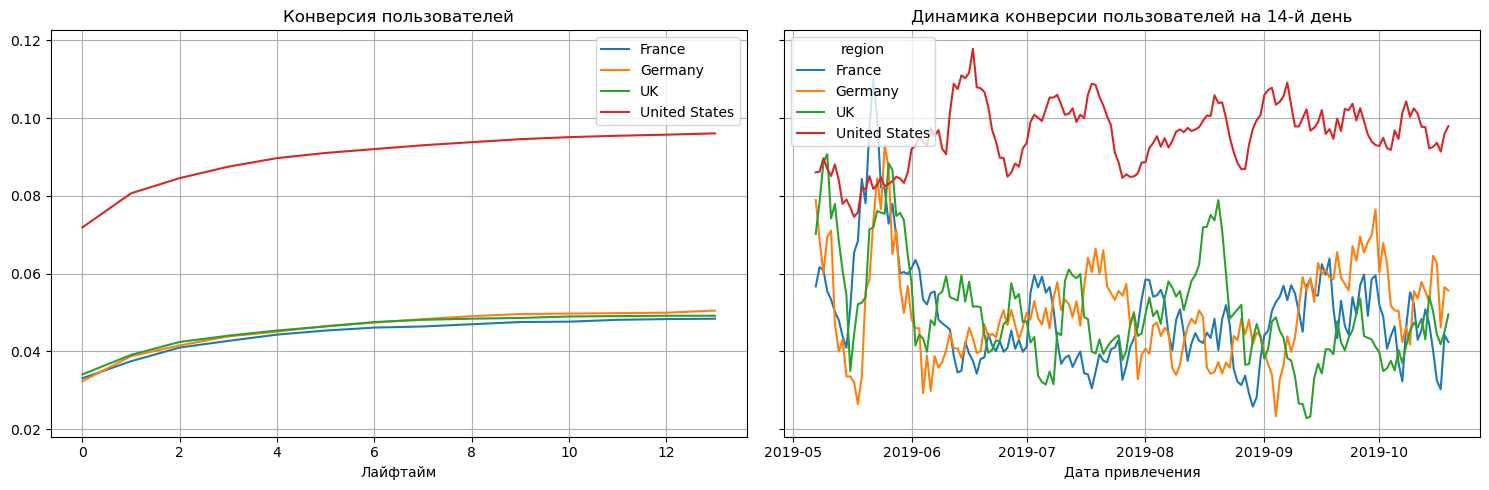

In [64]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days, dimensions = ['region'])

plot_conversion(result_grouped, result_in_time, horizon_days)

Пользователи из США хорошо конвертируются, далее рассмотрим удержания пользователей из США. 

#### Удержание пользователей по странам

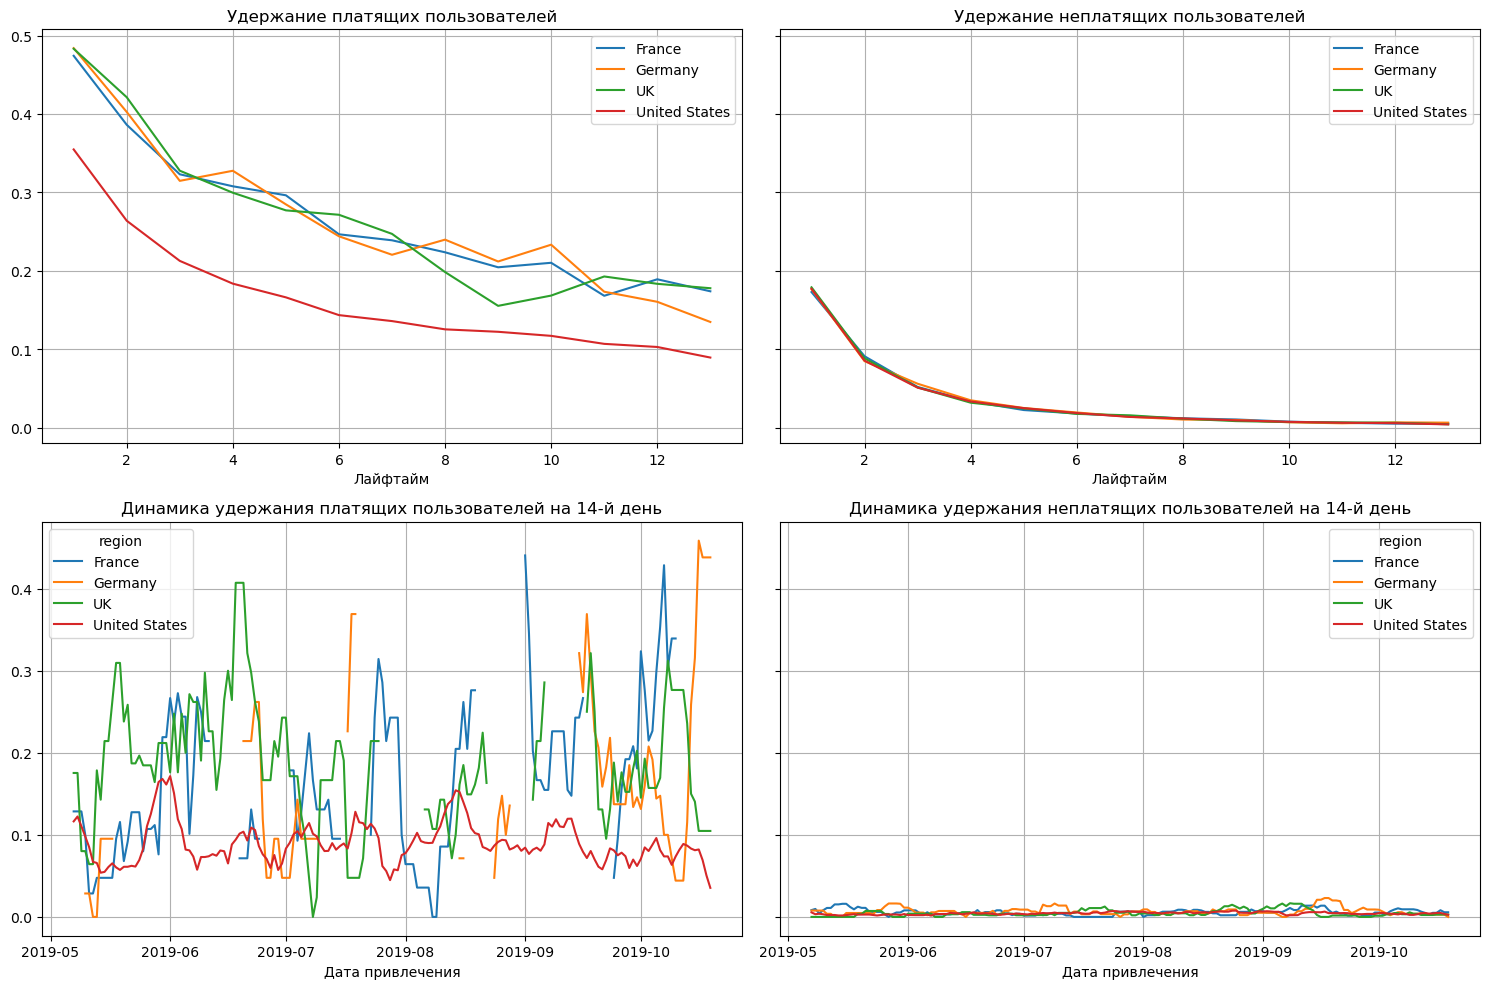

In [65]:
result_raw, result_grouped, result_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['region'])

plot_retention(result_grouped, result_in_time, horizon_days)

В США низкий показатель удержания платящих пользователей.

#### LTV, CAC, ROI в region = US

In [66]:
profiles_us = profiles.query('region == "United States"')

print(profiles_us.groupby('channel')['user_id'].count().sort_values(ascending = False))

profiles_us.groupby('channel')['acquisition_cost'].sum().sort_values(ascending = False)

channel
FaceBoom          29144
TipTop            19561
RocketSuperAds     4448
MediaTornado       4364
YRabbit            4312
Name: user_id, dtype: int64


channel
TipTop           54751.30
FaceBoom         32445.60
RocketSuperAds    1833.00
MediaTornado       954.48
YRabbit            944.22
Name: acquisition_cost, dtype: float64

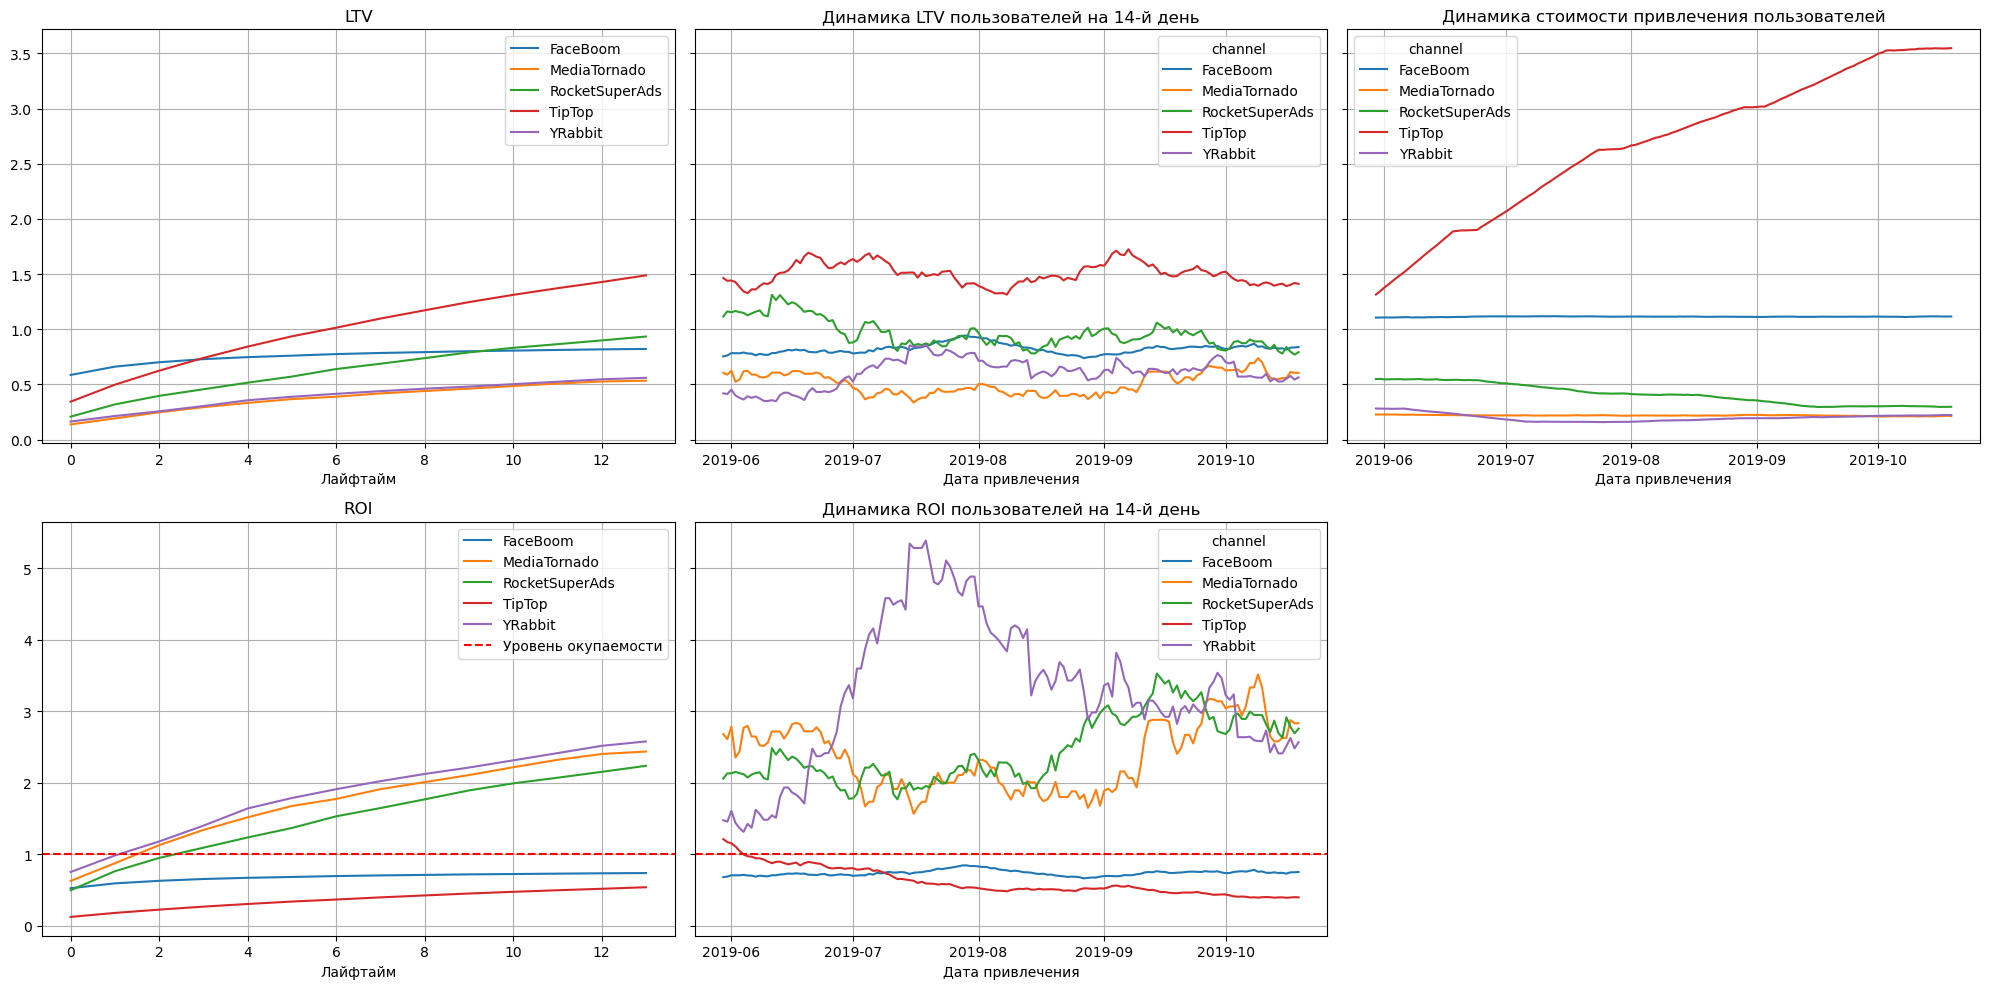

In [67]:
result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time = get_ltv(
  profiles_us, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_ltv_roi(result_grouped, result_in_time, roi_grouped, roi_in_time, horizon_days, window=30)

Видим, что в Facebook и TikTok на Америку льют. Тратят много, толку мало.

#### Конверсия по источникам

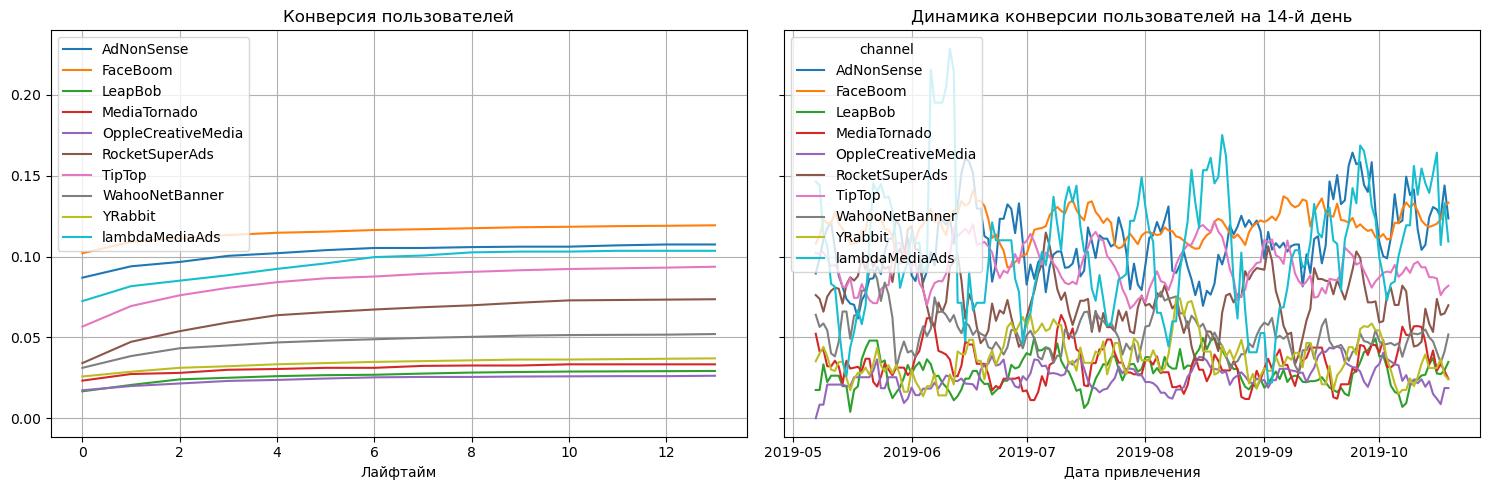

In [68]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_conversion(result_grouped, result_in_time, horizon_days)

Самые высокие показатели конвертации из источников: FaceBoom, AdNonSense, lamdaMediaAds и TipTop. Далее посмотрим на удержание аудитории по каналам привелчения.

#### Удержание пользователей по источникам

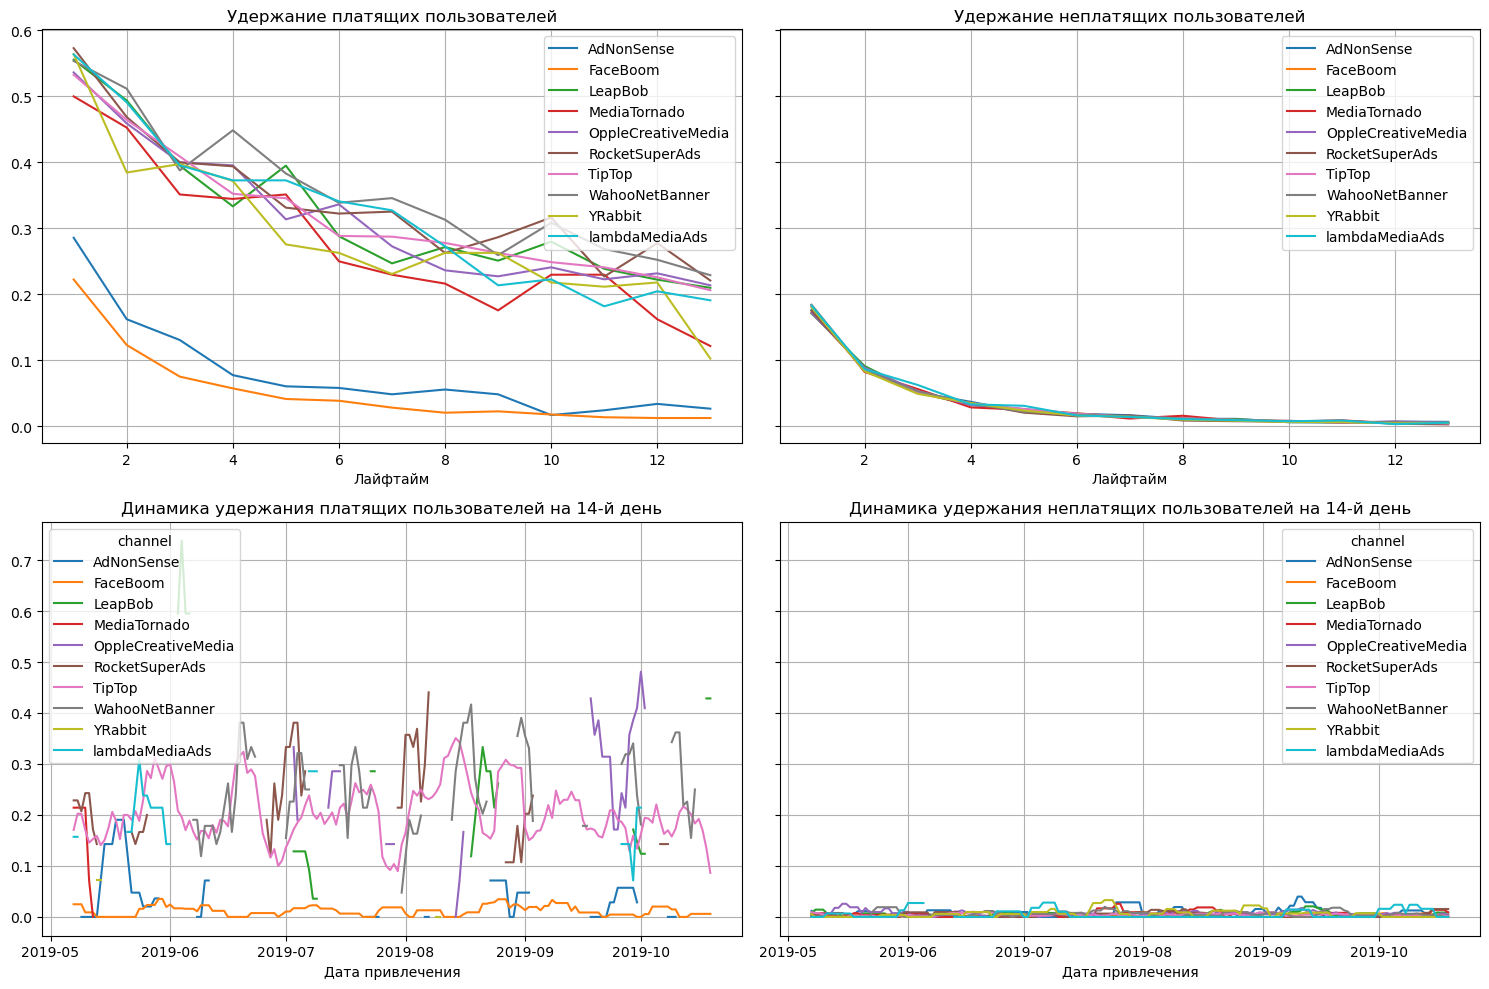

In [69]:
result_raw, result_grouped, result_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['channel'])

plot_retention(result_grouped, result_in_time, horizon_days)

Самый низкий показатель удержания у трафика из источников: FaceBoom и AdNonSense.

#### Конверсия по устройствам

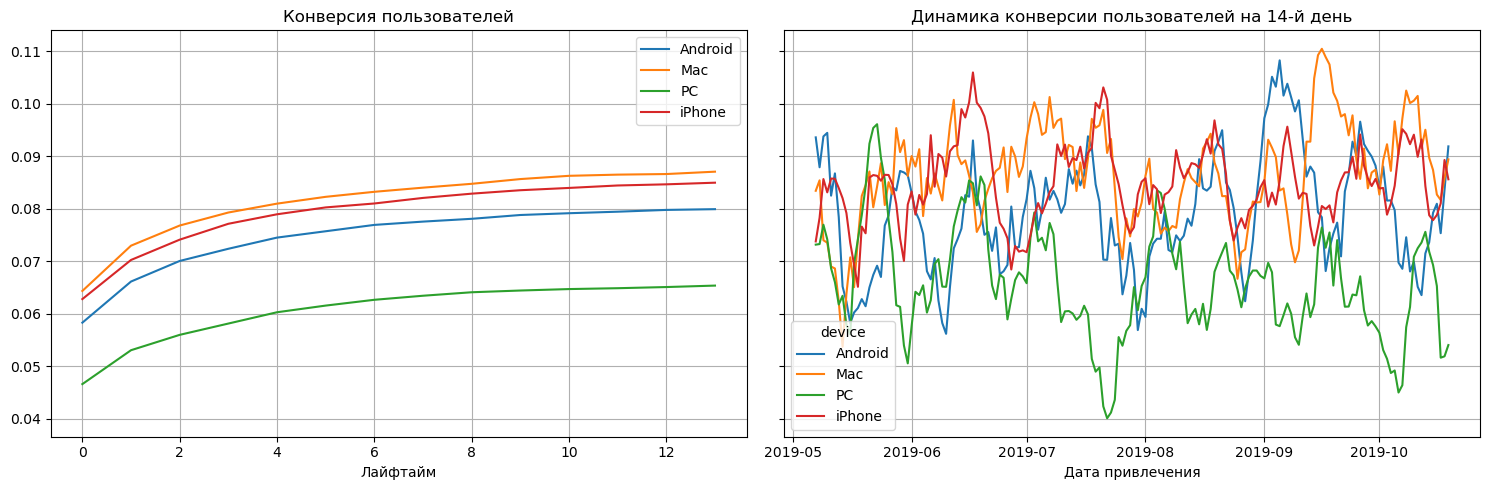

In [70]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_conversion(result_grouped, result_in_time, horizon_days)

Конверсия у пользователей PC хоть и низкая, но ROI у данной аудитории единственный положительный.

#### Удержание пользователей по устройствам

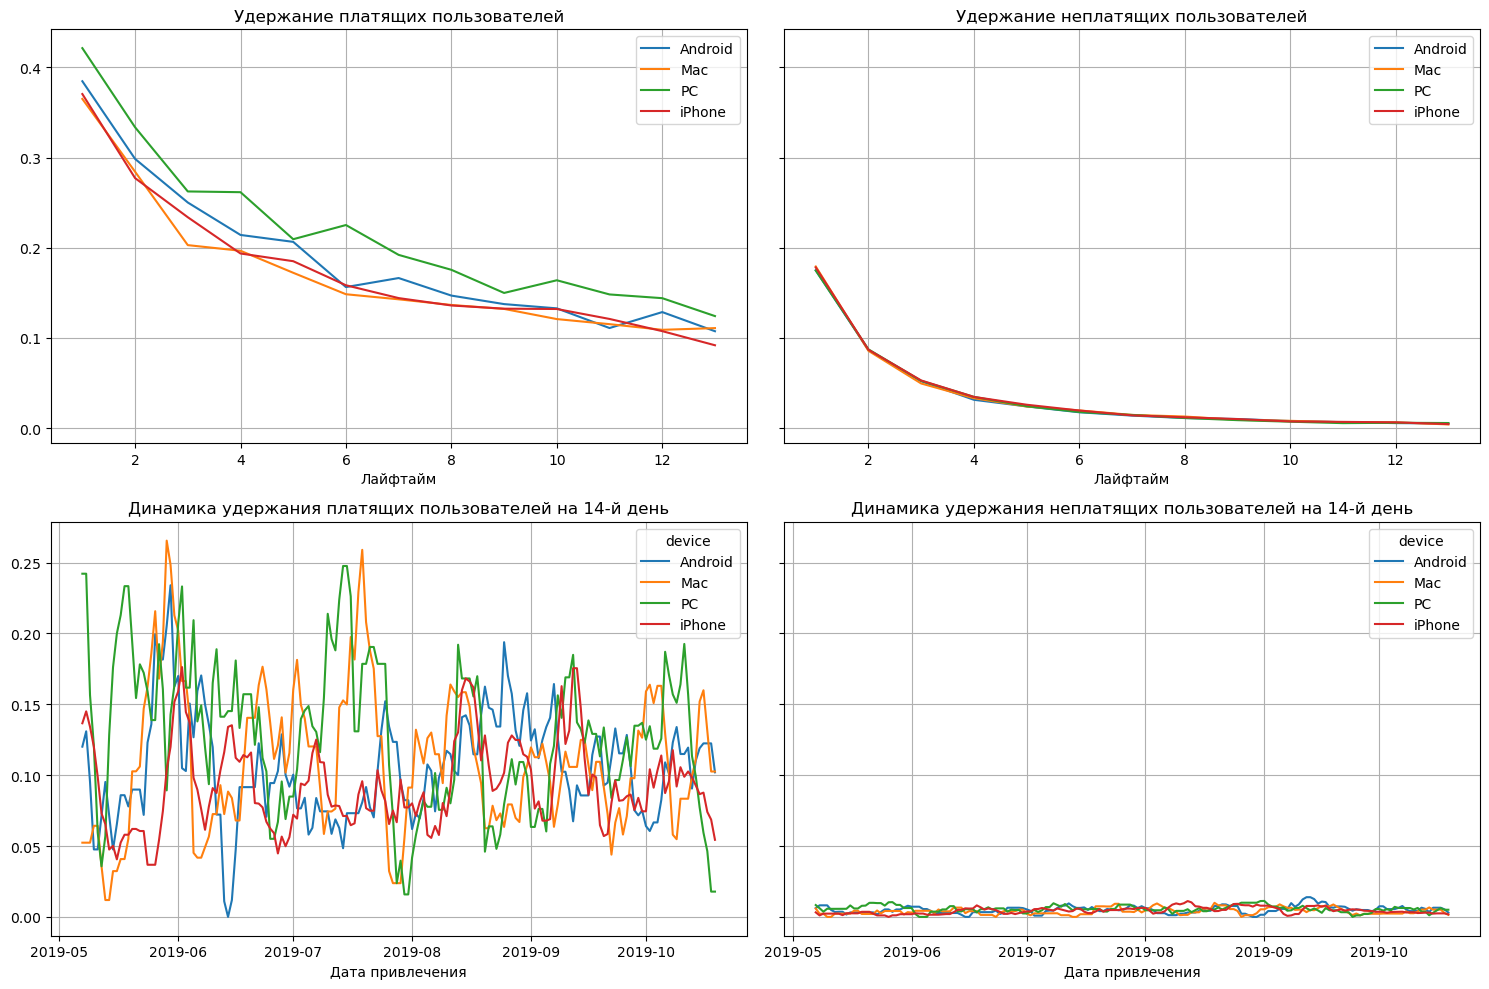

In [71]:
result_raw, result_grouped, result_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions = ['device'])

plot_retention(result_grouped, result_in_time, horizon_days)

Удержание пользователей в разбивке по девайсам стабильно.

In [72]:
profiles.groupby('payer')['user_id'].count()

payer
False    85848
True      7721
Name: user_id, dtype: int64

Общие выводы:

    1) Аудитория из США хоть и обладает высокой конверсией, но - она самая дорогая и хуже всего удерживается. Стоит подумать над воронкой.

    2) FaceBoom, AdNonSense и TipTop имеют хорошие показатели конверсии, но - TipTop траффик очень дорогой, а пользователи из FaceBoom и AdNonSense не удерживаются должным образом.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

По ходу исследования, сначала, можно было выделить три истоника траффика с хорошими показателями привлечения платящей аудитории и с умеренной стоимостью её привлечения: 

    1) lamdaMediaAds (0.73 - стоимость привлечечния одного юзера из которых доля платащих составляет 10,5%)

    2) AdNonSense (1.01 - стоимость привлечечния одного юзера из которых доля платащих составляет 11,3%)

    3) FaceBoom (1.11 - стоимость привлечечния одного юзера из которых доля платащих составляет 12,2%)

Но при дальнейшем рассмотре эффективности рекламы, выяснилось, что траффик источников AdNonSense и FaceBoom обладает низким показателем удержания, соответственно, стоит продумать воронку удержания платящей аудитории из данных истоников траффика, без существенного увелечения расходов на рекламу. Если же это нереализуемо, то стоит отказаться от них.

Также стоит обратить внимание, на такой источник Траффика, как TipTop, у которого самая высокая стоимость привлечения пользователей - 2.8, что в разы выше медианной - 0,51. В данном случае два выхода, либо опитимизация рекламной компании, что будет положительным исходом, т.к. удержание и конверсия данной аудитории впорядке, либо отказ от этого источника траффика.

Остальные источники траффика обладают умеренными, но положительными показателями, возможно, перенаправление рекламного бюджета в оставшиеся источники приведёт к положительным результатам. Наилучшими же показателями обладает 